 We are lookign at employee attrition in the healthcare industry.  The dataset we will be using is the NSI National Health Care Retention and RN Staffing report conducted in January 2022.  3,000 Hospitals were invited for this study.  The dataset contains responses from 272 hospitals from 32 states.  In total it covers 589,901 healthcare workers and 166,087 RNs. Our job is to take the different factors that goes into the job and develop a unsupervised Model that is able to show us performance trends for healthcare workers.  Specifically we are interested in trends in 'PerformanceRating', 'PercentSalaryHike', and 'TotalWorkingYears'.

This type of unsupervised model generally lends itself to a random forest.  First lets import the dataset.

In [1]:
import pandas as pd

# Load the data
data_path = '/kaggle/input/employee-attrition-for-healthcare/watson_healthcare_modified.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Check for missing values
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


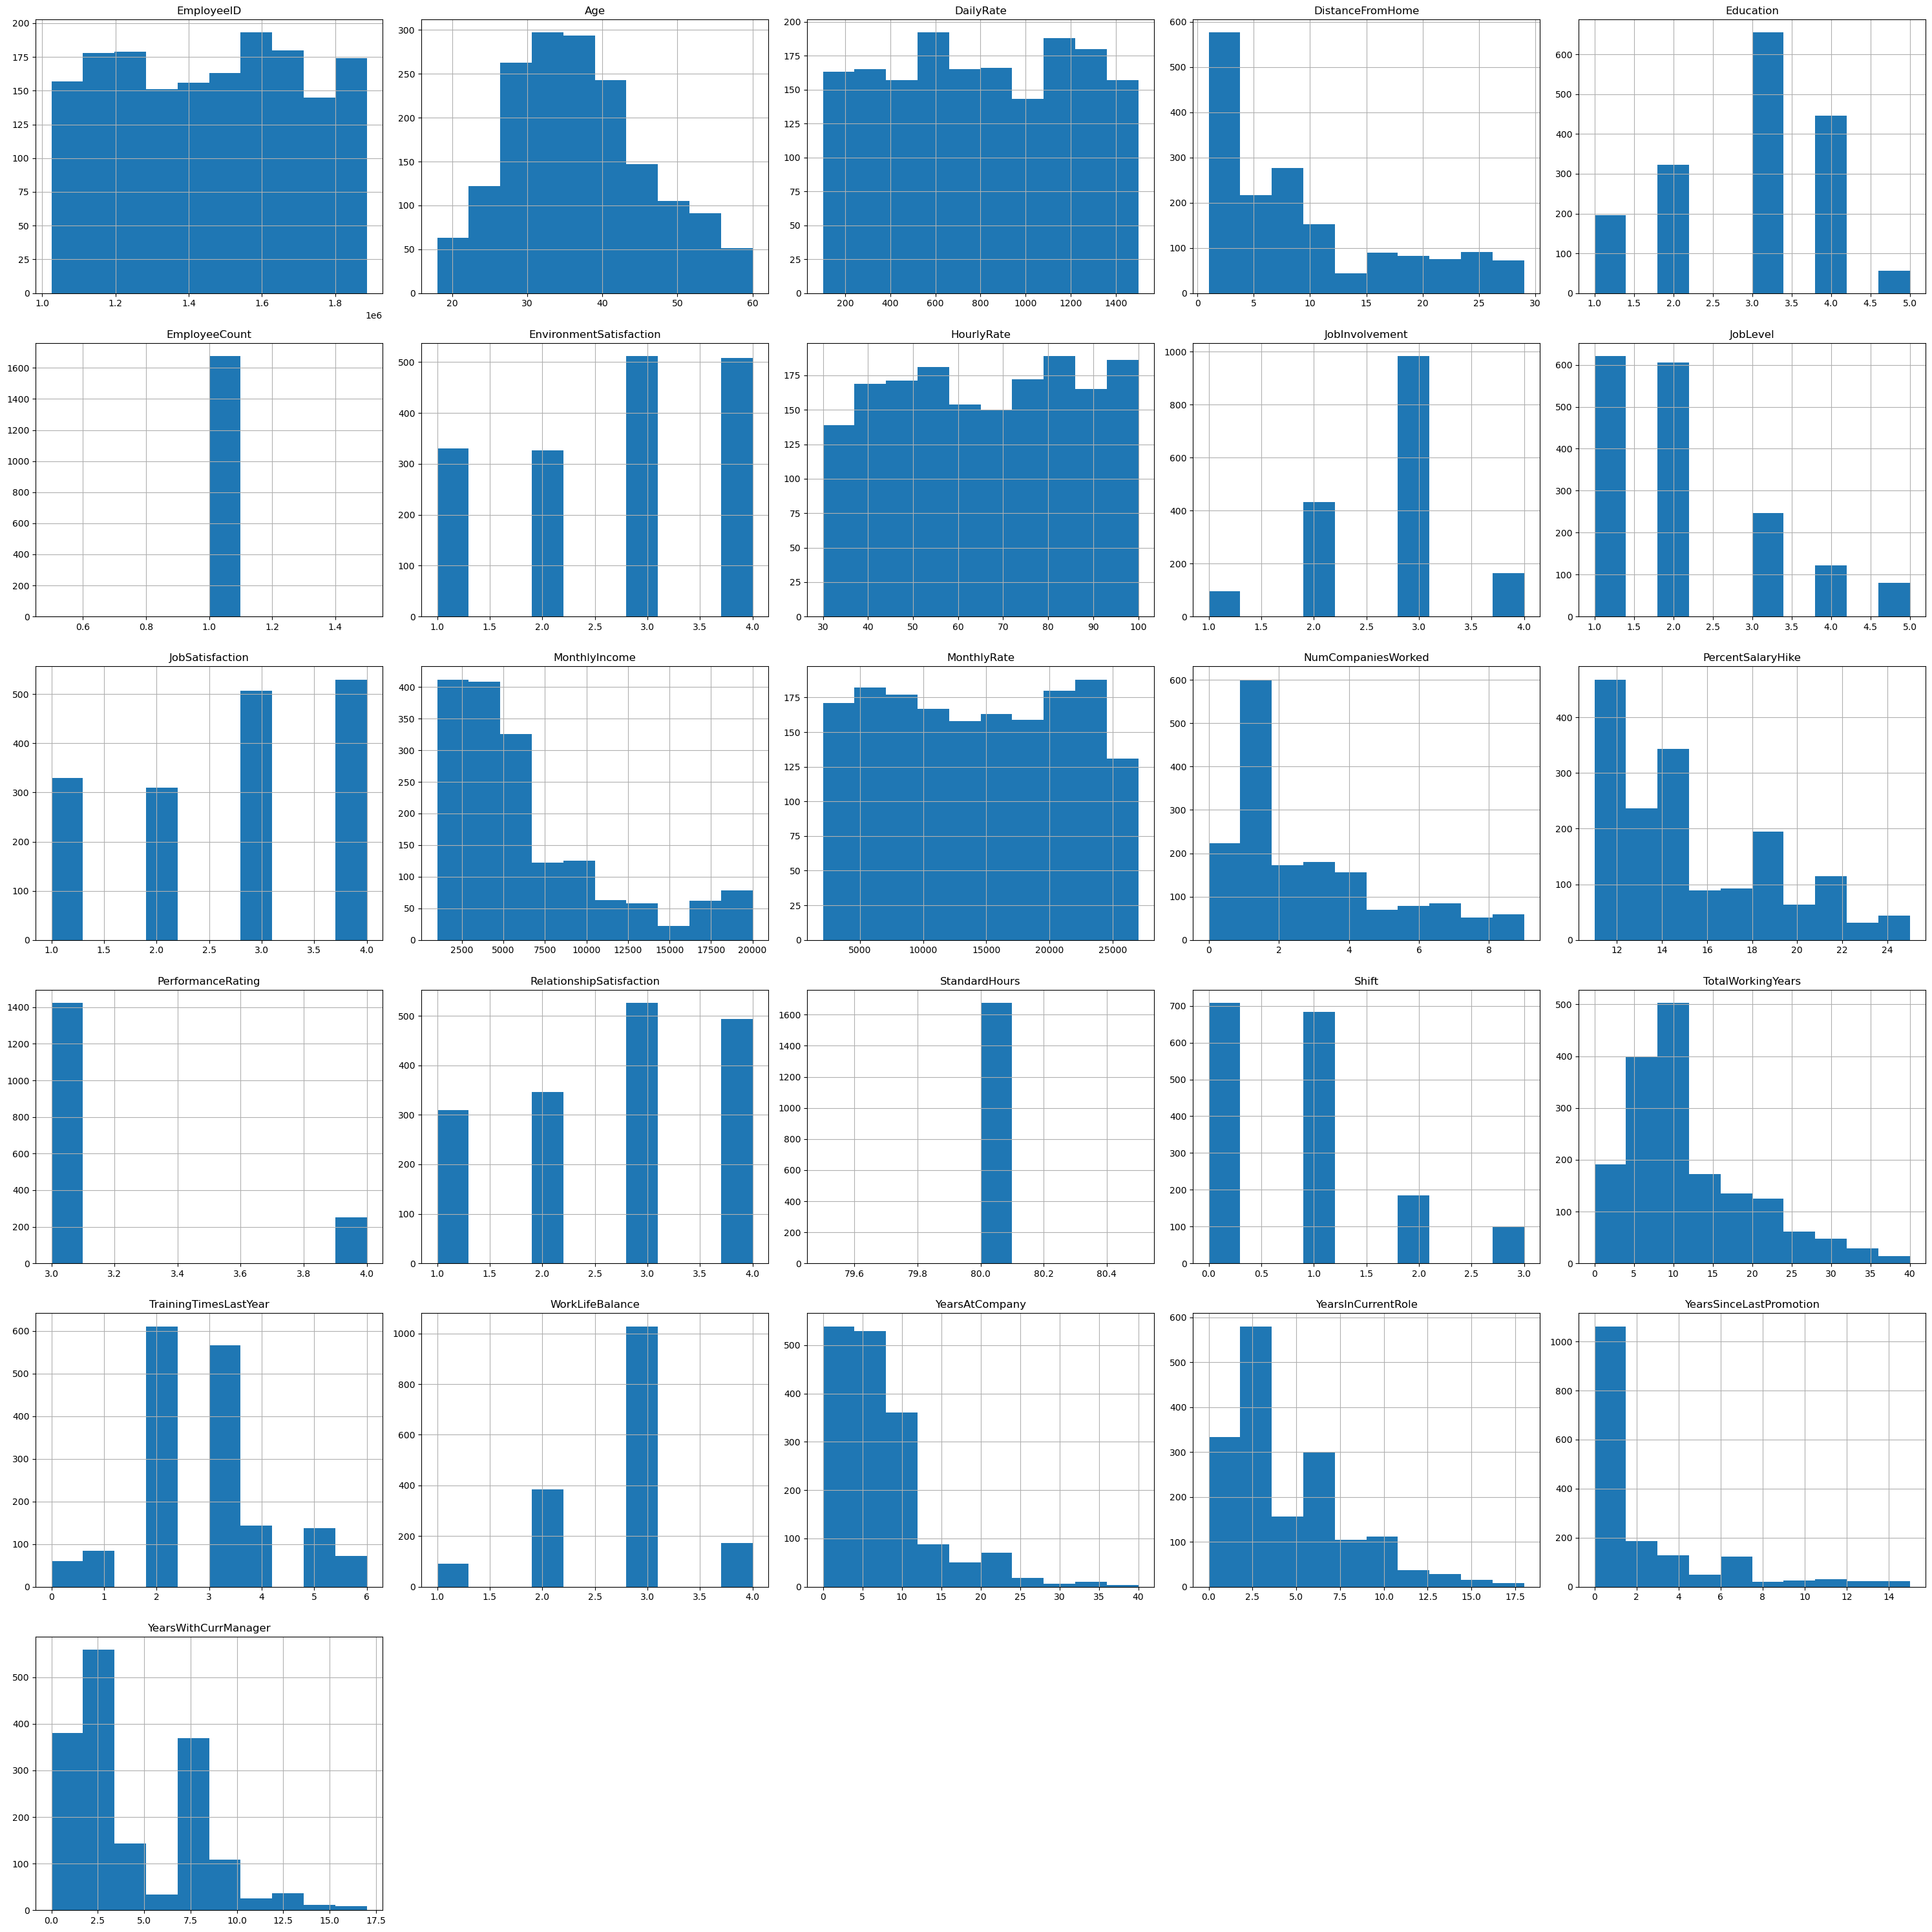

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numerical columns
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(30,30))
plt.tight_layout()
plt.show()

Age seems to follow a somewhat normal distribution with most employees in their 30s and early 40s.

DailyRate, HourlyRate, MonthlyIncome, and MonthlyRate also have varied distributions.

DistanceFromHome is right-skewed, indicating that many employees live close to their workplace.

TotalWorkingYears is also right-skewed, with most employees having less than 10 total working years.

YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager are all right-skewed, indicating that most employees have fewer years in their current role, with the company, since their last promotion, and with their current manager.

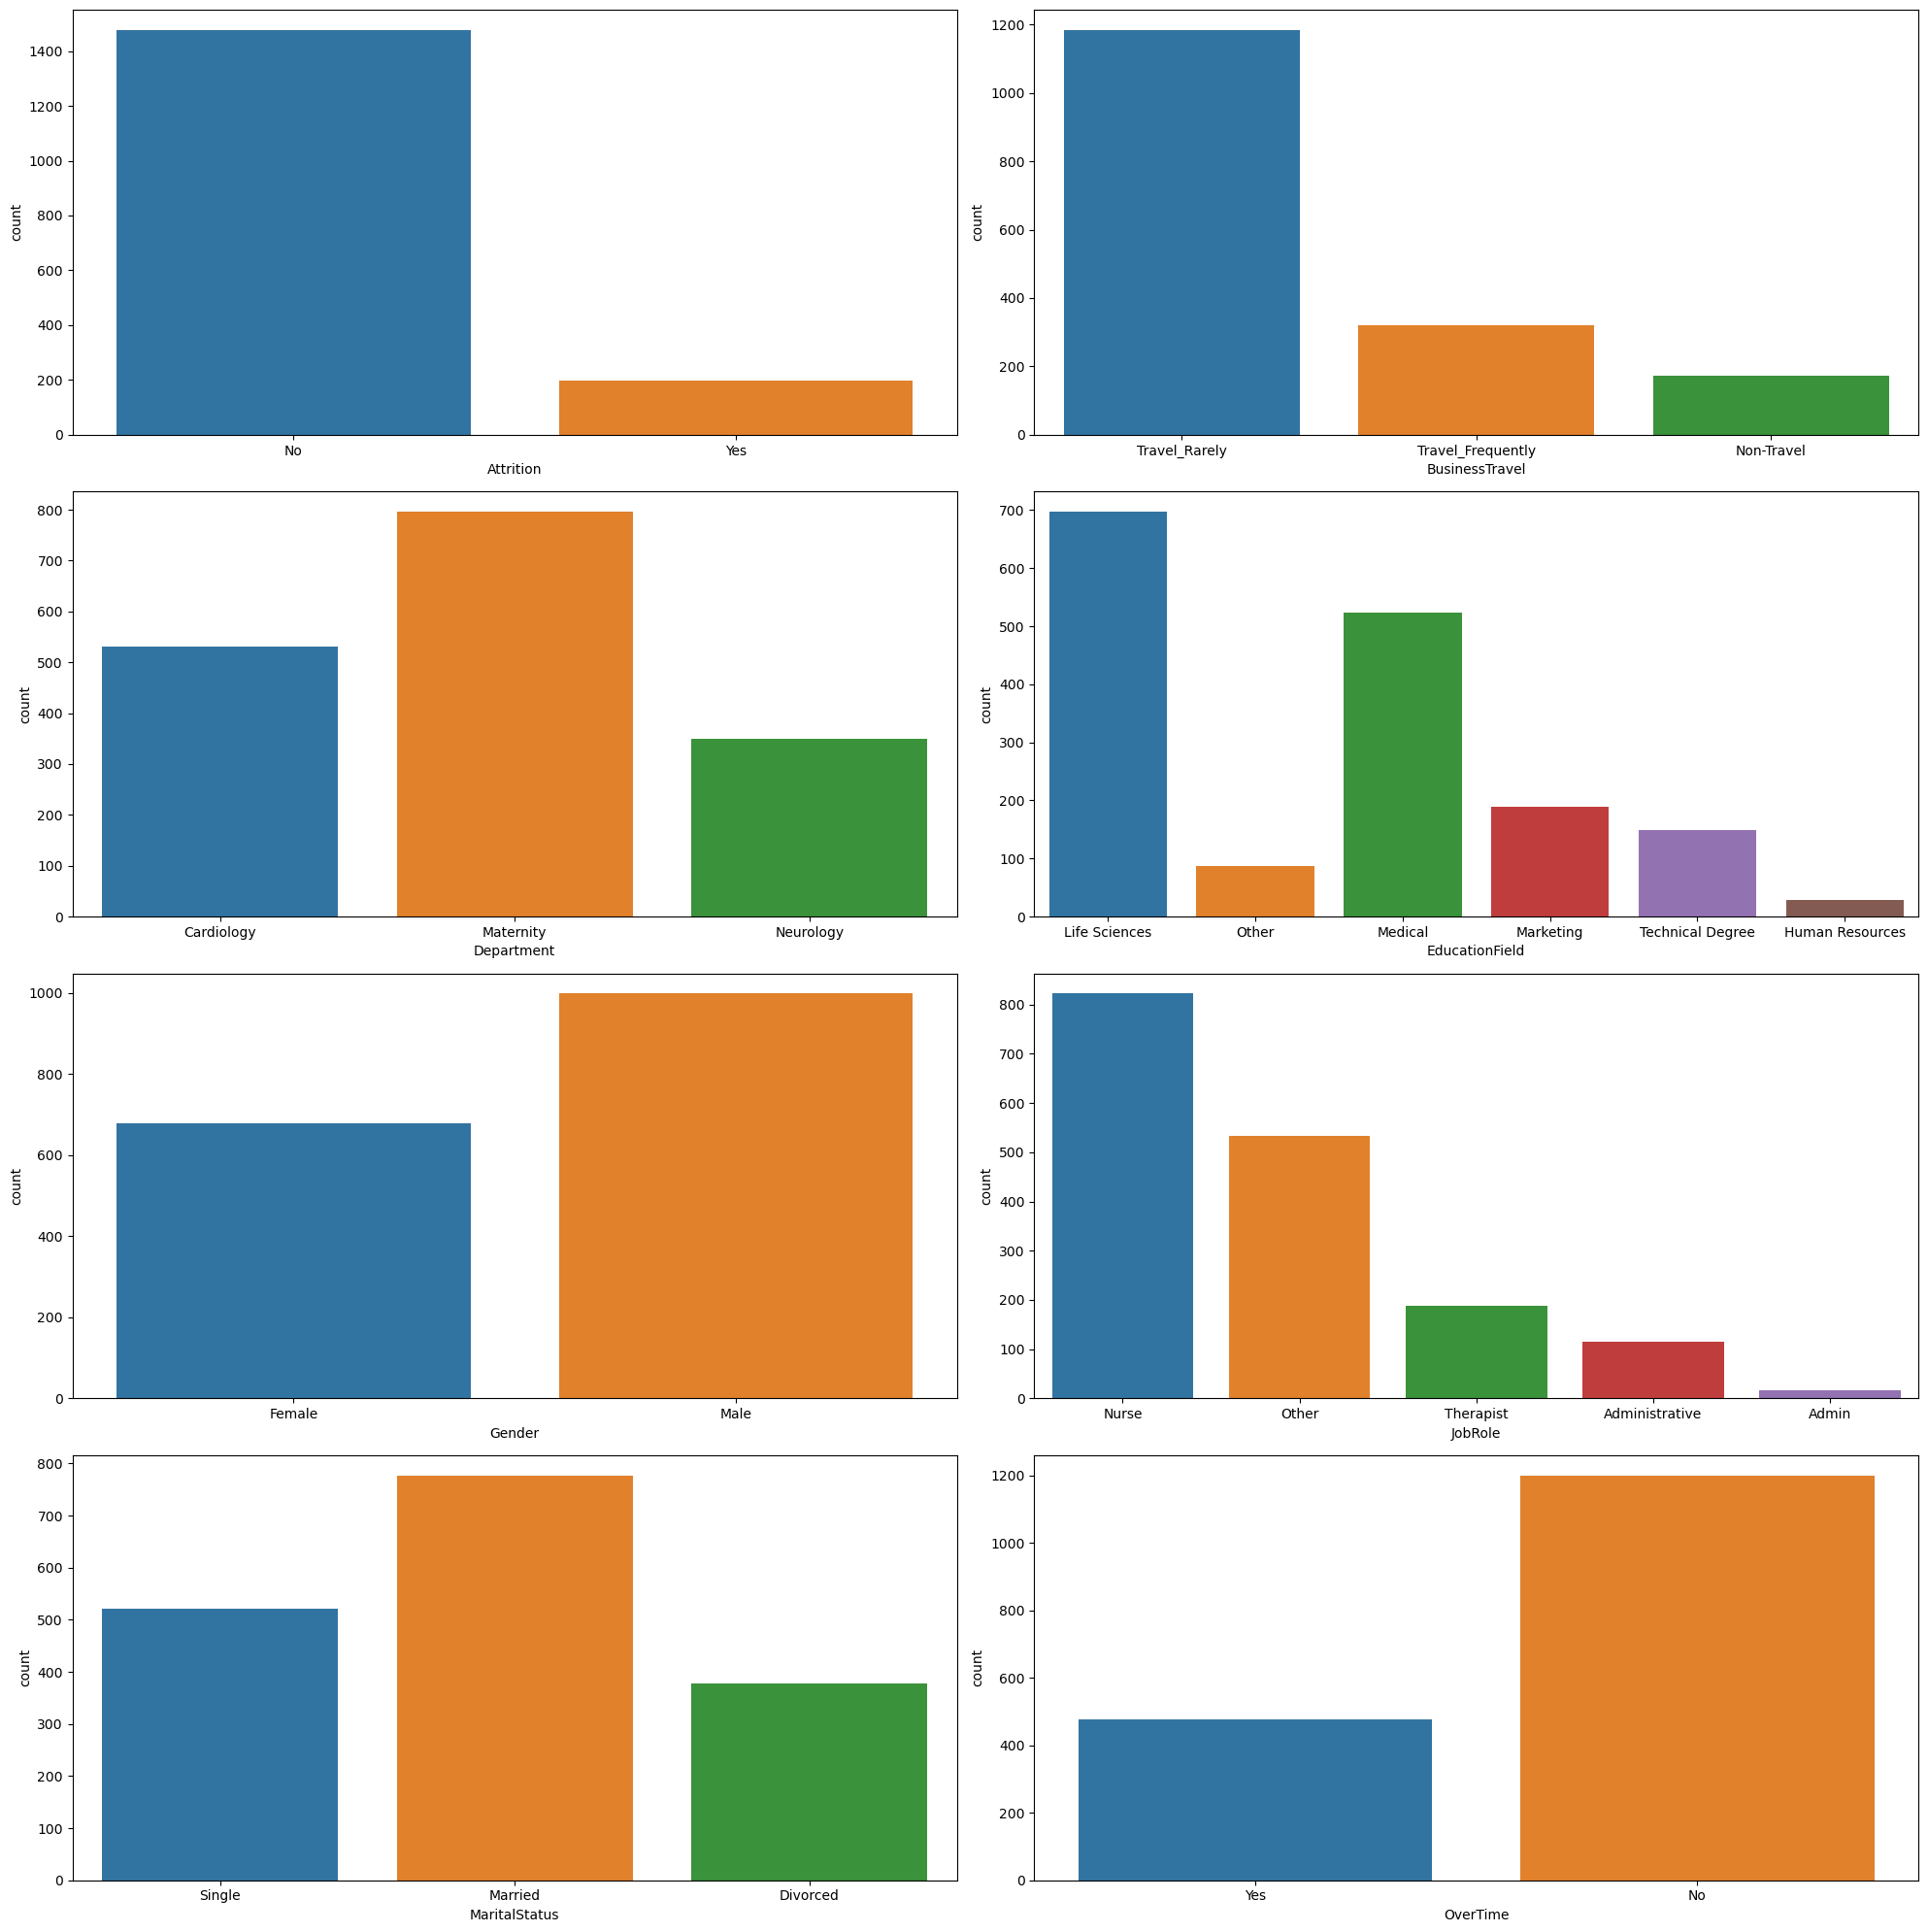

In [4]:
# Select a few categorical columns for visualization
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Plotting bar plots for categorical columns
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axs = axs.flatten() # to flatten the 2d array to 1d

for i, col_name in enumerate(categorical_cols):
    sns.countplot(x=col_name, data=df, ax=axs[i])
    
plt.tight_layout()
plt.show()

Attrition: A majority of employees have not left the company (No), while a smaller number have (Yes).


BusinessTravel: Most employees don't travel frequently, with the Travel_Rarely category being the most common, followed by Travel_Frequently and Non-Travel.


Department: The Maternity department has the most employees, followed by Cardiology.


EducationField: The most common fields of study are Life Sciences and Medical, followed by Marketing, Technical Degree, Other, and Human Resources.


Gender: There are more Male employees than Female.


JobRole: There are various job roles in the dataset, with Physician being the most common, followed by Nurse and Healthcare Representative.


MaritalStatus: The majority of employees are Married, followed by Single and Divorced.


OverTime: Most employees do not work overtime (No).

In [5]:
from sklearn import preprocessing

# Select features
selected_features = ['Attrition', 'PerformanceRating', 'PercentSalaryHike', 'TotalWorkingYears']

# Subset the dataframe
df_cluster = df[selected_features]

# Convert 'Attrition' to numerical values
df_cluster['Attrition'] = df_cluster['Attrition'].map({'No': 0, 'Yes': 1})

# Normalize the numerical columns
scaler = preprocessing.MinMaxScaler()
df_cluster[['PerformanceRating', 'PercentSalaryHike', 'TotalWorkingYears']] = scaler.fit_transform(df_cluster[['PerformanceRating', 'PercentSalaryHike', 'TotalWorkingYears']])

df_cluster.head()

/tmp/ipykernel_20/2431650085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Attrition'] = df_cluster['Attrition'].map({'No': 0, 'Yes': 1})
/tmp/ipykernel_20/2431650085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[['PerformanceRating', 'PercentSalaryHike', 'TotalWorkingYears']] = scaler.fit_transform(df_cluster[['PerformanceRating', 'PercentSalaryHike', 'TotalWorkingYears']])


,Attrition,PerformanceRating,PercentSalaryHike,TotalWorkingYears
0,0,0.0,0.000000,0.200
1,0,1.0,0.857143,0.250
2,1,0.0,0.285714,0.175
3,0,0.0,0.000000,0.200
4,0,0.0,0.071429,0.150


Let's proceed with K-Means clustering on the preprocessed data. We will also determine the optimal number of clusters using the Elbow method.  This involves running the algorithm with different numbers of clusters and looking for a "bend" in the plot of cost versus number of clusters. The optimal number of clusters is typically considered to be at this "elbow point".


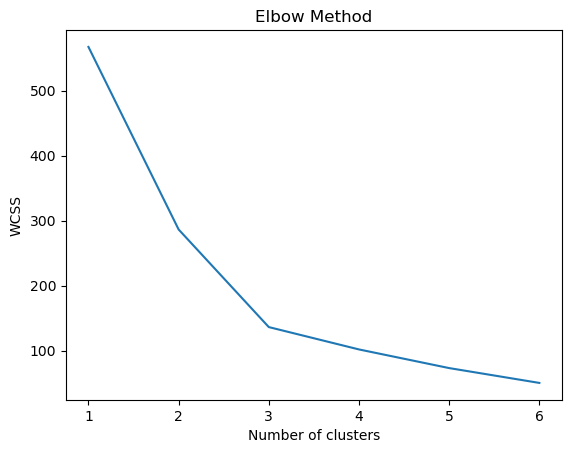

In [6]:
from sklearn.cluster import KMeans


# Elbow method to determine optimal number of clusters
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method plot shows the total within-cluster sum of square (WCSS) against the number of clusters. Ideally, we look for a "bend" in the plot that represents an optimal number of clusters. In this plot, there isn't a clear "bend". However, a reasonable choice may be 2 or 3 clusters, as after that the decrease in WCSS becomes more gradual.  

We will proceed to using 3 clusters.

In [7]:
# Apply KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_cluster)

# Add the clusters to the original dataframe
df_cluster['Cluster'] = clusters

df_cluster.head()

/tmp/ipykernel_20/457116840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = clusters


,Attrition,PerformanceRating,PercentSalaryHike,TotalWorkingYears,Cluster
0,0,0.0,0.000000,0.200,0
1,0,1.0,0.857143,0.250,1
2,1,0.0,0.285714,0.175,2
3,0,0.0,0.000000,0.200,0
4,0,0.0,0.071429,0.150,0


In [8]:
# Calculate the mean of each feature within each cluster
cluster_characteristics = df_cluster.groupby('Cluster').mean()
cluster_characteristics

,Attrition,PerformanceRating,PercentSalaryHike,TotalWorkingYears
Cluster,,,,
0,0.000000,0.0,0.216502,0.298409
1,0.126984,1.0,0.774376,0.290179
2,1.000000,0.0,0.210436,0.160928


The current values are normalized, which makes them easier to use in the clustering algorithm but harder to interpret. To convert them back, we can use the inverse_transform method of the MinMaxScaler object that we used for normalization.

Let's calculate the average characteristics of each cluster in terms of the original, non-normalized values.

In [9]:
# Rename clusters
cluster_characteristics.rename(index={0: 'No Attrition', 1: 'High Attrition', 2: 'Minimal Attrition'}, inplace=True)
# Drop the 'PerformanceRating' column
cluster_characteristics = cluster_characteristics.drop('PerformanceRating', axis=1)

cluster_characteristics

,Attrition,PercentSalaryHike,TotalWorkingYears
Cluster,,,
No Attrition,0.000000,0.216502,0.298409
High Attrition,0.126984,0.774376,0.290179
Minimal Attrition,1.000000,0.210436,0.160928


/tmp/ipykernel_20/3905053429.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


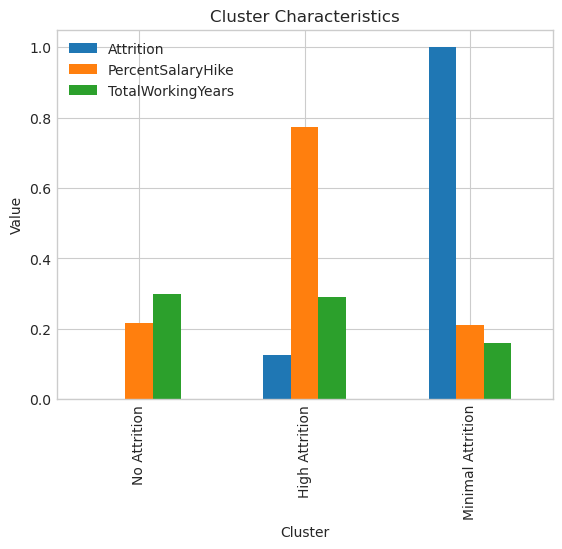

In [10]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-whitegrid')

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Generate a grouped bar plot
cluster_characteristics.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Value')
ax.set_title('Cluster Characteristics')

# Show the legend and plot
ax.legend(loc='best')
plt.show()

From this initial clustering method we can see that minimal and no attrition employees were clustered with higher total working years.  Which makes sense because people who have worked for a long time are less likely to want to change jobs.  Also we can see that high attrition was clustered with the lowest percent salary hike and the lowest total working years.  This also makes sense because employees who believe they are not getting compensated fairly and are earlier in thier careers are more prone to leaving. 

Next lets try optimizing our hyper-parameters to obtain better clustering.  One method we can use is the silhouette score.  The silhouette score measures the quality of the clustering by calculating how close each point in one cluster is to the points in the neighboring clusters. It ranges from -1 to 1, with higher scores indicating better clustering.

In [11]:
# This code will try all combinations of the hyperparameters in the grid 
# and print #out the combination that gives the best silhouette score. 

from sklearn.metrics import silhouette_score

# Define the hyperparameters grid
n_clusters_grid = [2, 3, 4, 5, 6]
init_grid = ['k-means++', 'random']

# Store the best parameters
best_n_clusters = None
best_init = None
best_score = -1

# Perform Grid Search
for n_clusters in n_clusters_grid:
    for init in init_grid:
        kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=300, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(df_cluster)
        
        # Calculate the silhouette score
        score = silhouette_score(df_cluster, clusters)
        
        # Update the best parameters if this score is better
        if score > best_score:
            best_n_clusters = n_clusters
            best_init = init
            best_score = score

print(f"Best number of clusters: {best_n_clusters}")
print(f"Best initialization method: {best_init}")
print(f"Best silhouette score: {best_score}")

Best number of clusters: 3
Best initialization method: k-means++
Best silhouette score: 0.7888976146362444


So this means we did use the optimal number of clusters and the best initialization method for our model. 

Next, let's look at clustering age with relationship satisfaction and attrition, as I am curious to how these would relate in our data.  

/tmp/ipykernel_20/3619040130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Attrition'] = df_cluster['Attrition'].map({'No': 0, 'Yes': 1})
/tmp/ipykernel_20/3619040130.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[['Age', 'RelationshipSatisfaction']] = scaler.fit_transform(df_cluster[['Age', 'RelationshipSatisfaction']])
/tmp/ipykernel_20/3619040130.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

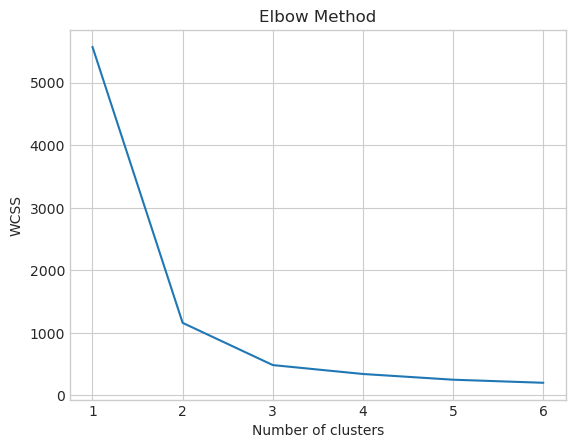

In [12]:
# Select features
selected_features = ['Attrition', 'Age', 'RelationshipSatisfaction']

# Subset the dataframe
df_cluster = df[selected_features]

# Convert 'Attrition' to numerical values
df_cluster['Attrition'] = df_cluster['Attrition'].map({'No': 0, 'Yes': 1})

# Normalize the numerical columns
scaler = preprocessing.MinMaxScaler()
df_cluster[['Age', 'RelationshipSatisfaction']] = scaler.fit_transform(df_cluster[['Age', 'RelationshipSatisfaction']])



# Add the clusters to the original dataframe
df_cluster['Cluster'] = clusters

# Elbow method to determine optimal number of clusters
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looks like 3 clusters is also ideal in this case so lets go ahead and use 3 clusters.

In [13]:
# Apply KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_cluster)

# Add the clusters to the original dataframe
df_cluster['Cluster'] = clusters

# Calculate the mean of each feature within each cluster
cluster_characteristics = df_cluster.groupby('Cluster').mean()


# Convert 'Attrition' back to 'Yes'/'No'
cluster_characteristics['Attrition'] = cluster_characteristics['Attrition'].apply(lambda x: 'Yes' if x > 0.5 else 'No')

# Rename clusters
cluster_characteristics.rename(index={0: 'No Attrition', 1: 'No Attrition', 2: 'High Attrition'}, inplace=True)

print(cluster_characteristics)

               Attrition       Age  RelationshipSatisfaction
Cluster                                                     
No Attrition          No  0.654849                  0.594485
No Attrition          No  0.396431                  0.568168
High Attrition       Yes  0.307131                  0.552764


/tmp/ipykernel_20/1977778540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = clusters


/tmp/ipykernel_20/2695664664.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


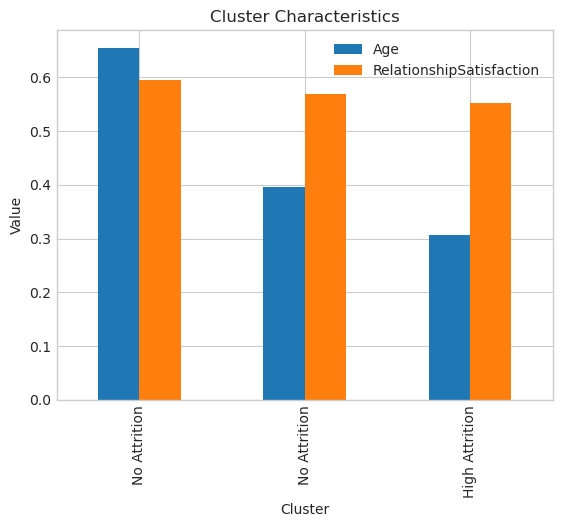

In [14]:
# Set the style
plt.style.use('seaborn-whitegrid')

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Generate a grouped bar plot
cluster_characteristics.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Value')
ax.set_title('Cluster Characteristics')

# Show the legend and plot
ax.legend(loc='best')
plt.show()

Before we extrapolate any results from this clustering, lets use the same method as before to see if we chose the best hyper-parameters for our clustering.

In [15]:
# Define the hyperparameters grid
n_clusters_grid = [2, 3, 4, 5, 6]
init_grid = ['k-means++', 'random']

# Store the best parameters
best_n_clusters = None
best_init = None
best_score = -1

# Perform Grid Search
for n_clusters in n_clusters_grid:
    for init in init_grid:
        kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=300, n_init=10, random_state=0)
        clusters = kmeans.fit_predict(df_cluster)
        
        # Calculate the silhouette score
        score = silhouette_score(df_cluster, clusters)
        
        # Update the best parameters if this score is better
        if score > best_score:
            best_n_clusters = n_clusters
            best_init = init
            best_score = score
            
print(f"Best number of clusters: {best_n_clusters}")
print(f"Best initialization method: {best_init}")
print(f"Best silhouette score: {best_score}")

Best number of clusters: 3
Best initialization method: k-means++
Best silhouette score: 0.59103170903794


Since our silhouette score shows that we indeed use the best hyperparameters for this clustering (3 clusters, k-mean++ initialization), lets take a look at the results.  It seems that the biggest difference between the No and High attrition clusters was age.  This makes sense since younger people might be more okay with changing jobs ealier in thier lives since they might not be settled down with kids and families.  What is interesting is that it does not seem like relationship satisfaction did not play any role.  Both no attrition clusters had people of higher age with drastically different relationship satisfactions.

Conclusion

This was a fun unsupervised model to run.  It provided some interesting insights into the attrition of healthcare workers.  Much of what I learned from thisclustering model I believe can also be applied to other industries.  Mainly that younger employees who are not getting compensated well, are the most prone to attrition.  

Running the models and finding the best hyper-parameters went smoothly and using the elbow method did help us find the optimal number of clusters to use for our k means clustering each time, which was further validated through obtaining our silhouette scores.  

Future thoughts on this project would be that 